<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


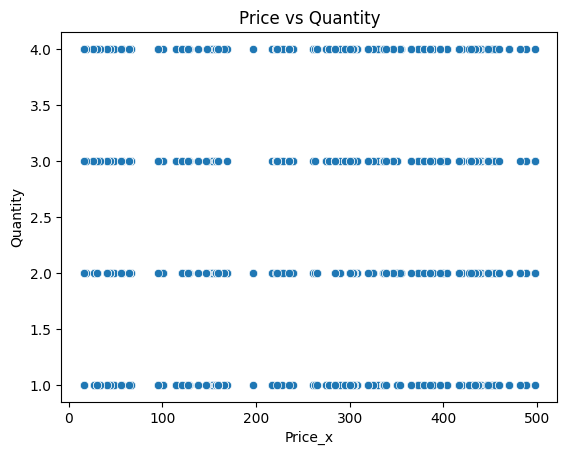

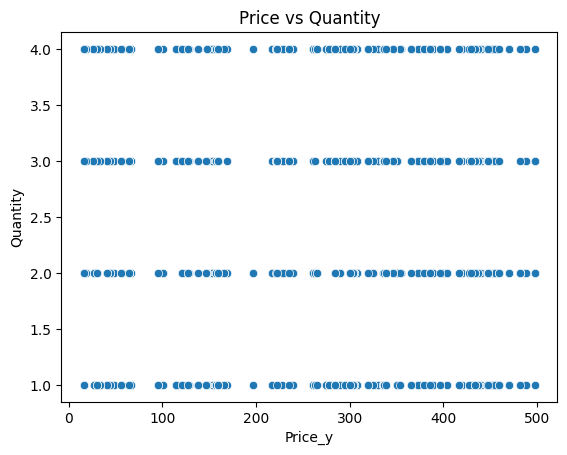

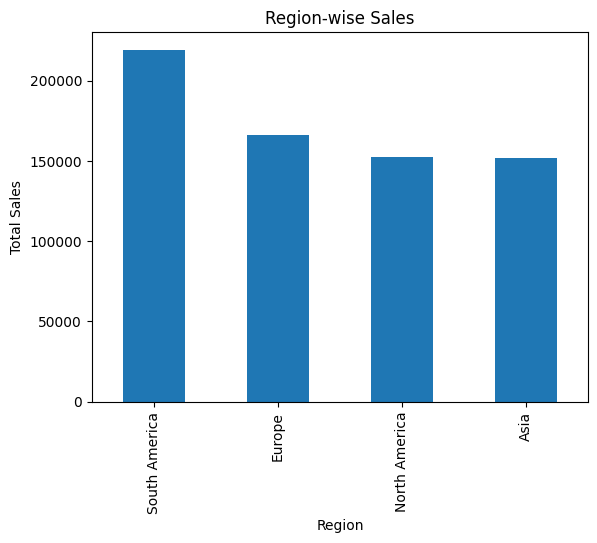

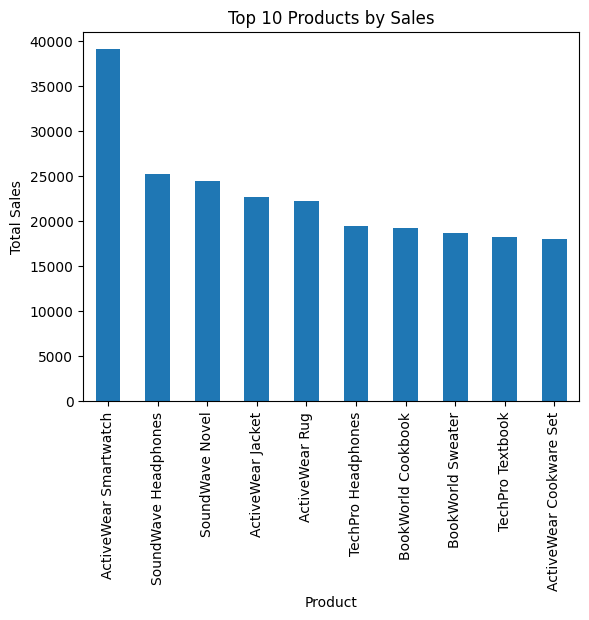

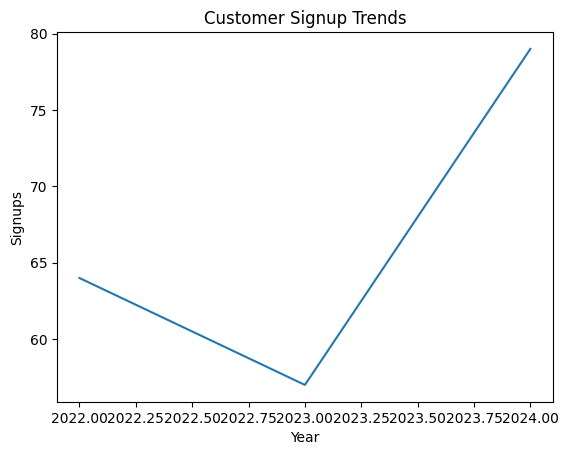

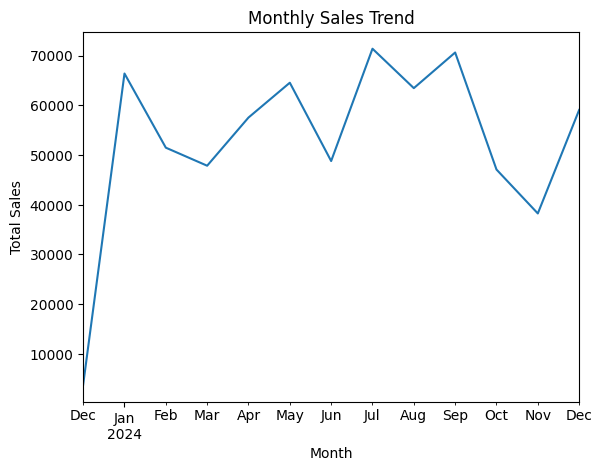

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

print(customers.info(), products.info(), transactions.info())

merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

print(merged_data.isnull().sum())
print(f"Duplicate Rows: {merged_data.duplicated().sum()}")

print(merged_data.describe())

region_sales = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print(region_sales)

top_products = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
print(top_products)

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
signup_trends = customers['SignupDate'].dt.year.value_counts().sort_index()
print(signup_trends)

merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
monthly_sales = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()


sns.scatterplot(data=merged_data, x='Price_x', y='Quantity')
plt.title('Price vs Quantity')
plt.show()

sns.scatterplot(data=merged_data, x='Price_y', y='Quantity')
plt.title('Price vs Quantity')
plt.show()

region_sales.plot(kind='bar', title='Region-wise Sales', xlabel='Region', ylabel='Total Sales')
plt.show()

top_products.plot(kind='bar', title='Top 10 Products by Sales', xlabel='Product', ylabel='Total Sales')
plt.show()

signup_trends.plot(kind='line', title='Customer Signup Trends', xlabel='Year', ylabel='Signups')
plt.show()

monthly_sales.plot(title='Monthly Sales Trend', xlabel='Month', ylabel='Total Sales')
plt.show()